In [1]:
weather = '/home/vant/Escritorio/MasterDataScience/Clases/Python/weather_year.csv'

In [2]:
%%time
!cat {weather} |wc -l

367
CPU times: user 7.18 ms, sys: 135 µs, total: 7.31 ms
Wall time: 109 ms


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [4]:
pd.options.display.max_columns=None
dfw = pd.read_csv (weather)
dfw.head()

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,30.53,30.45,30.34,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,30.37,30.27,30.13,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,30.13,29.99,29.88,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,30.12,30.06,29.97,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,30.15,30.10,30.04,10,10,10,16,6,22.0,0.00,0,NaN,202


In [5]:
# dfw.shape # dfw.count() #dfw.dtypes #dfw.describe

In [6]:
dfw1 = dfw[['EDT', 'Mean TemperatureF', ' Events']]
dfw1.head()

,EDT,Mean TemperatureF,Events
0,2012-3-10,40,NaN
1,2012-3-11,49,Rain
2,2012-3-12,62,Rain
3,2012-3-13,63,NaN
4,2012-3-14,62,NaN


In [7]:
dfw1.dtypes

EDT                  object
Mean TemperatureF     int64
 Events              object
dtype: object

In [9]:
dfw2 = dfw1[dfw1['Mean TemperatureF'] < 40]
dfw2.head()

,EDT,Mean TemperatureF,Events
238,2012-11-3,38,Rain
239,2012-11-4,38,NaN
240,2012-11-5,37,NaN
241,2012-11-6,38,Rain
243,2012-11-8,38,Fog


In [10]:
dfw3 = dfw2[dfw2[' Events'].isin(['Snow','Fog-Snow'])]

In [11]:
dfw3

,EDT,Mean TemperatureF,Events
286,2012-12-21,26,Fog-Snow
291,2012-12-26,31,Fog-Snow
293,2012-12-28,31,Snow
294,2012-12-29,28,Fog-Snow
296,2012-12-31,31,Fog-Snow
301,2013-1-5,24,Snow
320,2013-1-24,19,Snow
321,2013-1-25,25,Snow
327,2013-1-31,21,Fog-Snow
328,2013-2-1,11,Snow


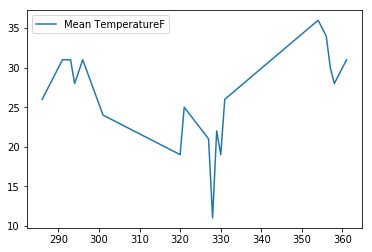

In [12]:
dfw3.plot();

In [13]:
dfw3['Mean TemperatureF'].sum()

473

In [14]:
dfw3.describe()

,Mean TemperatureF
count,18.000000
mean,26.277778
std,6.210101
min,11.000000
25%,22.500000
50%,27.000000
75%,31.000000
max,36.000000


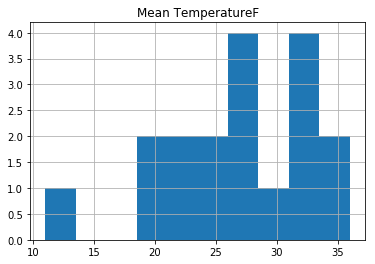

In [15]:
dfw3.hist();

/home/vant/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


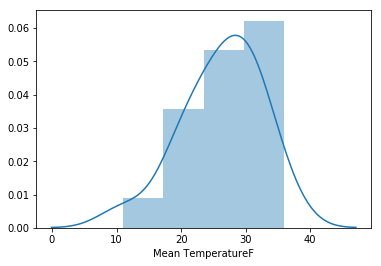

In [16]:
import seaborn as sns

sns.distplot(dfw3['Mean TemperatureF']);

In [24]:
dfw4 = dfw[['EDT', 'Max TemperatureF', 'Mean TemperatureF','Min TemperatureF',' Events']]
dfw5 = dfw4[dfw4[' Events'].isin(['Snow','Fog-Snow'])]
dfw5


,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Events
286,2012-12-21,29,26,22,Fog-Snow
291,2012-12-26,33,31,29,Fog-Snow
293,2012-12-28,33,31,29,Snow
294,2012-12-29,32,28,23,Fog-Snow
296,2012-12-31,36,31,25,Fog-Snow
301,2013-1-5,39,24,9,Snow
320,2013-1-24,26,19,11,Snow
321,2013-1-25,30,25,20,Snow
327,2013-1-31,31,21,10,Fog-Snow
328,2013-2-1,16,11,5,Snow


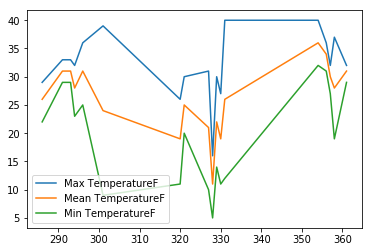

In [23]:
dfw5.plot()

In [25]:
dfw5.describe()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF
count,18.000000,18.000000,18.000000
mean,32.166667,26.277778,19.888889
std,5.792998,6.210101,8.757443
min,16.000000,11.000000,5.000000
25%,30.000000,22.500000,11.250000
50%,32.000000,27.000000,21.000000
75%,36.000000,31.000000,28.500000
max,40.000000,36.000000,32.000000


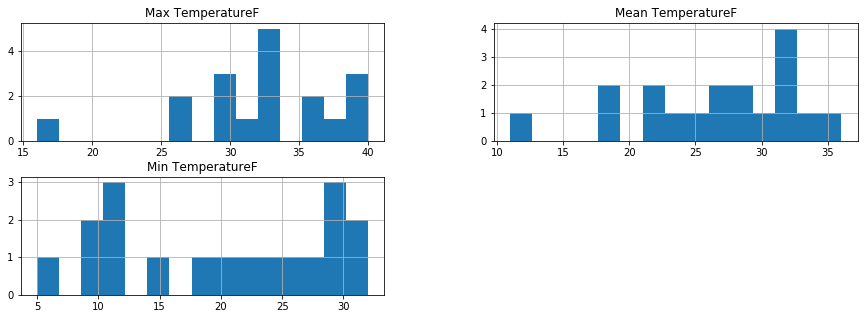

In [35]:
dfw5.hist(figsize=(15, 5), bins=15);

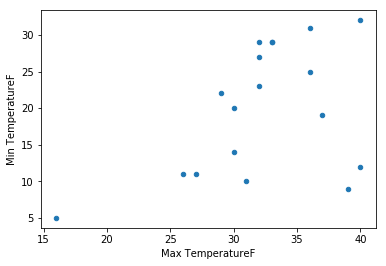

In [37]:
dfw5.plot('Max TemperatureF', 'Min TemperatureF', kind='scatter');

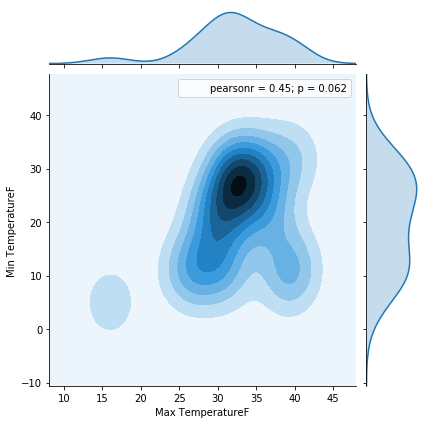

In [39]:
sns.jointplot(data=dfw5, x='Max TemperatureF', y='Min TemperatureF', kind='kde');

In [40]:
import plotly
plotly.__version__

'3.5.0'

In [52]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline

plotly.offline.init_notebook_mode(connected=True)


trace1 = {"x": dfw5['EDT'], 
          "y": dfw5['Min TemperatureF'], 
          "marker": {"color": "red", "size": 12}, 
          "mode": "markers", 
          "name": "Min", 
          "type": "scatter"
}

trace2 = {"x": dfw5['EDT'], 
          "y": dfw5['Max TemperatureF'], 
          "marker": {"color": "blue", "size": 12}, 
          "mode": "markers", 
          "name": "Max", 
          "type": "scatter", 
}

data = [trace1, trace2]
layout = {"title": "Snowing at San Francisco", 
          "xaxis": {"title": "Days", }, 
          "yaxis": {"title": "Temperature"}}

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='basicplotly_try')